In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
X = np.random.randn(300, 3)
y = (X[:, 0] + X[:, 1] + X[:, 2] > 1).astype(int)

In [32]:
df = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3'])
df['label'] = y

In [33]:
df.head()

,feature1,feature2,feature3,label
0,-0.728533,0.510271,0.074551,0
1,-0.404168,-1.638244,1.181840,0
2,-0.341856,-0.395891,-0.699697,0
3,0.310161,0.517989,0.553355,1
4,1.703822,-1.414547,-1.803426,0


In [34]:
X = df.drop('label', axis=1)
y = df['label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [36]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5
)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
accuracy_score(y_pred, y_test)

0.85

In [40]:
rf.feature_importances_

array([0.29947742, 0.30916475, 0.39135784])

In [41]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=2079940347)

In [42]:
rf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2079940347),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=506114050),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1287008576),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1274791610),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2013107665),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=477261629),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=510565818),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=211520309),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1985096897),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=393159652),
 DecisionTreeClassifier(max_depth=5, max_feat

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

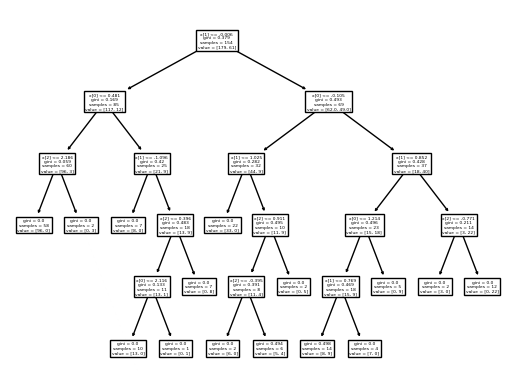

In [44]:
tree.plot_tree(rf.estimators_[0])
plt.show()

In [46]:
rf.predict([[0.2, 0.4, 0.2]])

/Users/ssharma/Desktop/python_tutorial/data_science/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [102]:
df = pd.read_csv("data/toyota.csv")

In [103]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [104]:
df['transmission'].value_counts()

transmission
Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: count, dtype: int64

In [105]:
df['model'].value_counts()

model
Yaris            2122
Aygo             1961
Auris             712
C-HR              479
RAV4              473
Corolla           267
Prius             232
Avensis           115
Verso             114
Hilux              86
GT86               73
Land Cruiser       51
PROACE VERSO       15
Supra              12
Camry              11
IQ                  8
Urban Cruiser       4
Verso-S             3
Name: count, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [107]:
y = df['transmission']
X = df.drop('transmission', axis=1)

In [108]:
from sklearn.preprocessing import LabelEncoder

model_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()

X['model'] = model_encoder.fit_transform(X['model'])
X['fuelType'] = fuel_type_encoder.fit_transform(X['fuelType'])

In [ ]:
mappings = {}
for index, value in enumerate(model_encoder.classes_):
    mappings[value] = index
    

# list comprehension
mylist = ["apple", "banana", "grape"]
anotherlist = []
for item in mylist:
    first_letter = item[0]
    anotherlist.append(first_letter)

anotherlist = [item[0] for item in ['apple', 'banana', 'grape']]
anotherlist

In [123]:
model_encoder.classes_
fuel_type_encoder.classes_

{label: i for i, label in enumerate(fuel_type_encoder.classes_)}

{'Diesel': 0, 'Hybrid': 1, 'Other': 2, 'Petrol': 3}

In [109]:
X.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,24089,3,265,36.2,2.0
1,6,2017,15995,18615,3,145,36.2,2.0
2,6,2015,13998,27469,3,265,36.2,2.0
3,6,2017,18998,14736,3,150,36.2,2.0
4,6,2017,17498,36284,3,145,36.2,2.0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [112]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [113]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [114]:
y_pred = rf.predict(X_test)

In [115]:
accuracy_score(y_pred, y_test)

0.9020771513353115

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(y_pred, y_test)

array([[472,   2,   1,   4],
       [ 88, 742,   0,  39],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

In [90]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [133]:
data = [[' GT86', 2016, 18000, 28900, 'Petrol', 767, 23.4, 2.0]]

predict_df = pd.DataFrame(data, columns=['model', 'year', 'price', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'])

In [134]:
predict_df.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,18000,28900,Petrol,767,23.4,2.0


In [135]:
predict_df['model'] = model_encoder.transform(predict_df['model'])

In [136]:
predict_df['fuelType'] = fuel_type_encoder.transform(predict_df['fuelType'])

In [141]:
rf.predict(predict_df)

array(['Manual'], dtype=object)

In [142]:
def pipeline():
    model_name = input("Enter the model_name: ")
    year
    price
    mileage
    fuelType
    tax
    mpg
    engineSize

    data = [[model_name, year, price, mileage, fuelType, tax, mpg, engineSize]]
    predict_df = pd.DataFrame(data, columns=['model', 'year', 'price', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'])
    predict_df['model'] = model_encoder.transform(predict_df['model'])
    predict_df['fuelType'] = fuel_type_encoder.transform(predict_df['fuelType'])
    print(rf.predict(predict_df)[0])
    
pipeline()

Enter the model_name:  GT86
